In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.utils import shuffle 
from sklearn.base import BaseEstimator, ClassifierMixin, clone  
import copy 
import time 
from joblib import Parallel, delayed  
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.utils.validation import check_is_fitted 
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import normalize 
from sklearn.metrics import average_precision_score 
import plotly.graph_objects as go 
import tempfile  
from scipy.stats import mode 
from itertools import product  
from sklearn.base import BaseEstimator, ClassifierMixin  
from sklearn.base import clone


from gradientboostingregressor import RandomBoostingRegressor
import unittest
from sklearn.feature_selection import RFE 
from sklearn.tree import DecisionTreeRegressor

RandomBoostingRegressor:
MSE: 0.3111
R²: 0.7626

GradientBoostingRegressor:
MSE: 0.2940
R²: 0.7756


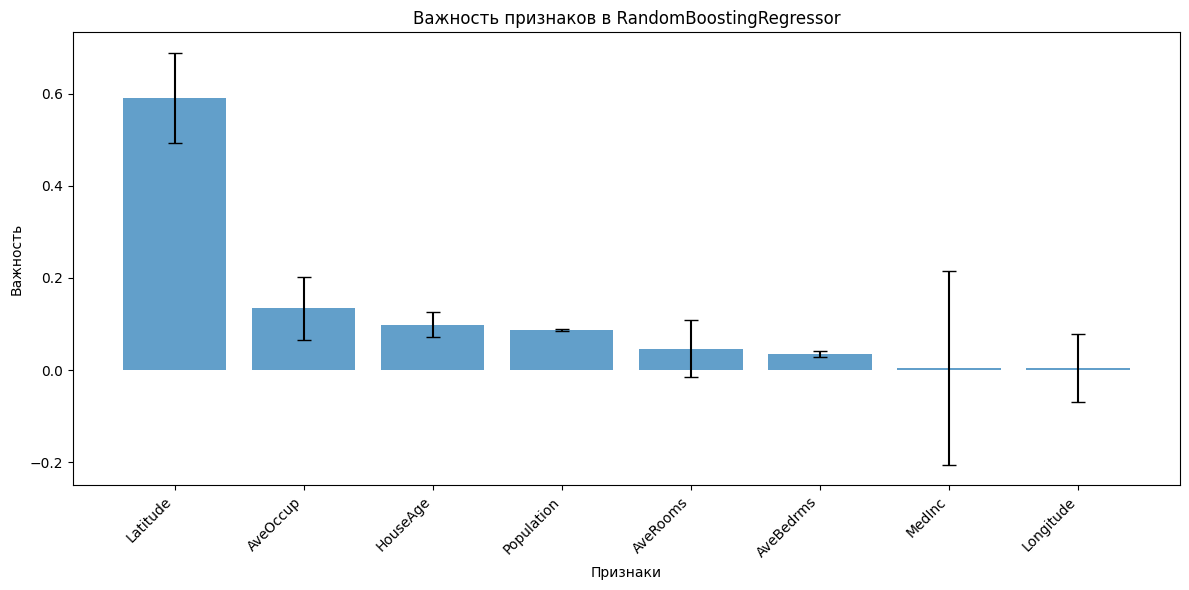

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rb_regressor = RandomBoostingRegressor(
    n_estimators=10,
    gb_n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    model_features=0.8,  # Используем 80% признаков в каждой модели
    n_jobs=4,
    random_state=42
)

rb_regressor.fit(X_train, y_train)


y_pred_rb = rb_regressor.predict(X_test)
mse_rb = mean_squared_error(y_test, y_pred_rb)
r2_rb = r2_score(y_test, y_pred_rb)
print("RandomBoostingRegressor:")
print(f"MSE: {mse_rb:.4f}")
print(f"R²: {r2_rb:.4f}")

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)


mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print("\nGradientBoostingRegressor:")
print(f"MSE: {mse_gbr:.4f}")
print(f"R²: {r2_gbr:.4f}")


feature_importances = rb_regressor.feature_importances_
features = rb_regressor.feature_names_in_
variances = rb_regressor.feature_importances_var_


stds = np.sqrt(variances)
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
sorted_stds = stds[sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_features)), sorted_importances, yerr=sorted_stds, capsize=5, align='center', alpha=0.7)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha="right")
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков в RandomBoostingRegressor')
plt.tight_layout()
plt.show()


In [3]:
start_time = time.time()

rb= RandomBoostingRegressor(
    n_estimators=1,
    gb_n_estimators=1,
    learning_rate=0.1,
    max_depth=3,
    model_features=0.8,  # Используем 80% признаков в каждой модели
    n_jobs=30, 
    warm_start = True,
    random_state=42
)
rb.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time   
print('time1: ',elapsed_time)
print('gb_n_estimators: ', rb.modelsTrast[0].model.n_estimators) 
print('n_estimators: ', len(rb.modelsTrast))  



print('\n')
start_time = time.time()
rb.set_params(n_estimators=20, gb_n_estimators = 10)
rb.fit(X_train, y_train) 
end_time = time.time()
elapsed_time = end_time - start_time   
print('time2: ',elapsed_time)
print('gb_n_estimators: ', rb.modelsTrast[0].model.n_estimators) 
print('gn_estimators: ', len(rb.modelsTrast)) 

time1:  1.195638656616211
gb_n_estimators:  1
n_estimators:  1


time2:  1.557619571685791
gb_n_estimators:  10
gn_estimators:  20


In [4]:
start_time = time.time()

rb= RandomBoostingRegressor(
    n_estimators=1,
    gb_n_estimators=160,
    learning_rate=0.1,
    max_depth=3,
    model_features=0.8,  # Используем 80% признаков в каждой модели
    n_jobs=1, 
    warm_start = True,
    random_state=42
)
rb.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time   
print(f"Время выполнения1 : {elapsed_time:.2f} секунд")
print('gb_n_estimators: ', rb.modelsTrast[0].model.n_estimators) 
print('n_estimators: ', len(rb.modelsTrast))  



print('\n')
start_time = time.time()
rb.set_params(gb_n_estimators = 161)
rb.fit(X_train, y_train) 
end_time = time.time()
elapsed_time = end_time - start_time   
print(f"Время выполнения2: {elapsed_time:.2f} секунд")
print('gb_n_estimators: ', rb.modelsTrast[0].model.n_estimators) 
print('gn_estimators: ', len(rb.modelsTrast)) 

Время выполнения1 : 4.33 секунд
gb_n_estimators:  160
n_estimators:  1


Время выполнения2: 0.10 секунд
gb_n_estimators:  161
gn_estimators:  1


In [5]:
start_time = time.time()

rb= RandomBoostingRegressor(
    n_estimators=19,
    gb_n_estimators=10,
    learning_rate=0.1,
    max_depth=3,
    model_features=0.8,  # Используем 80% признаков в каждой модели
    n_jobs=1, 
    warm_start = True,
    random_state=42
)
rb.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time   
print(f"Время выполнения1 : {elapsed_time:.2f} секунд")
print('gb_n_estimators: ', rb.modelsTrast[0].model.n_estimators) 
print('n_estimators: ', len(rb.modelsTrast))  



print('\n')
start_time = time.time()
rb.set_params(n_estimators = 20)
rb.fit(X_train, y_train) 
end_time = time.time()
elapsed_time = end_time - start_time   
print(f"Время выполнения2: {elapsed_time:.2f} секунд")
print('gb_n_estimators: ', rb.modelsTrast[0].model.n_estimators) 
print('gn_estimators: ', len(rb.modelsTrast)) 

Время выполнения1 : 5.54 секунд
gb_n_estimators:  10
n_estimators:  19


Время выполнения2: 0.42 секунд
gb_n_estimators:  10
gn_estimators:  20


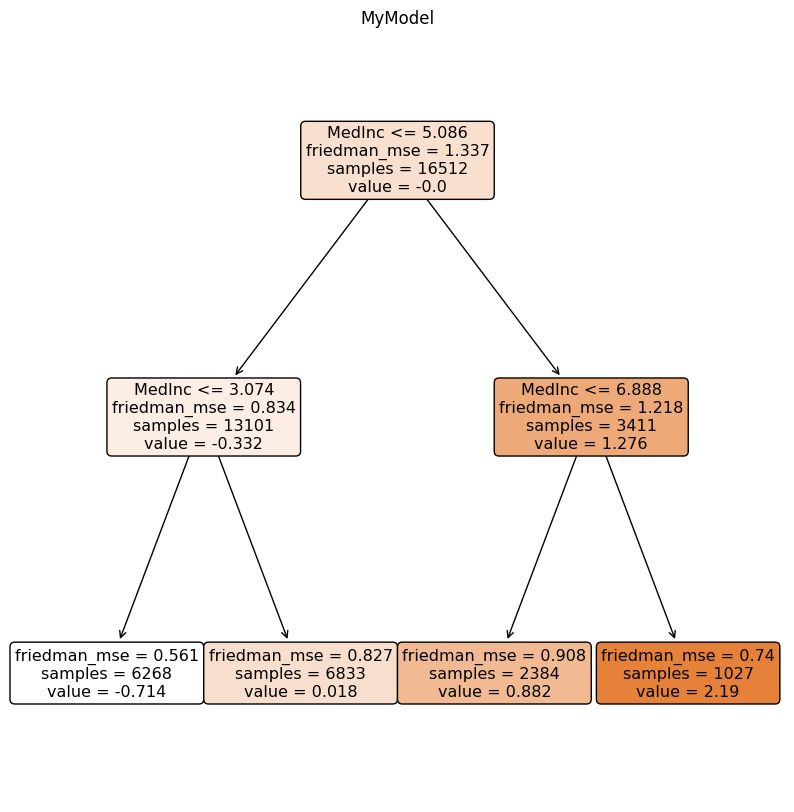

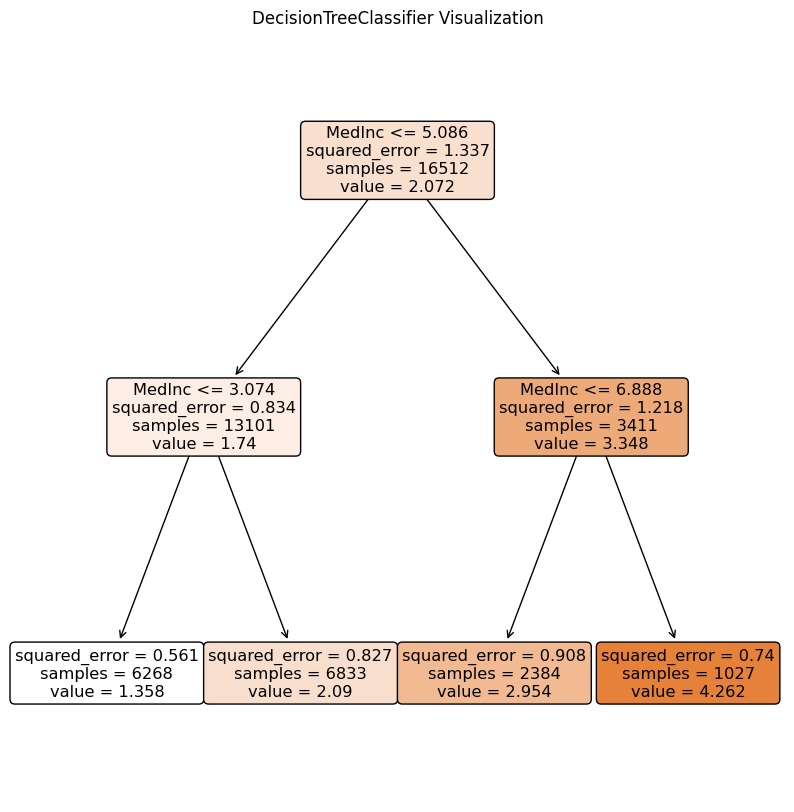

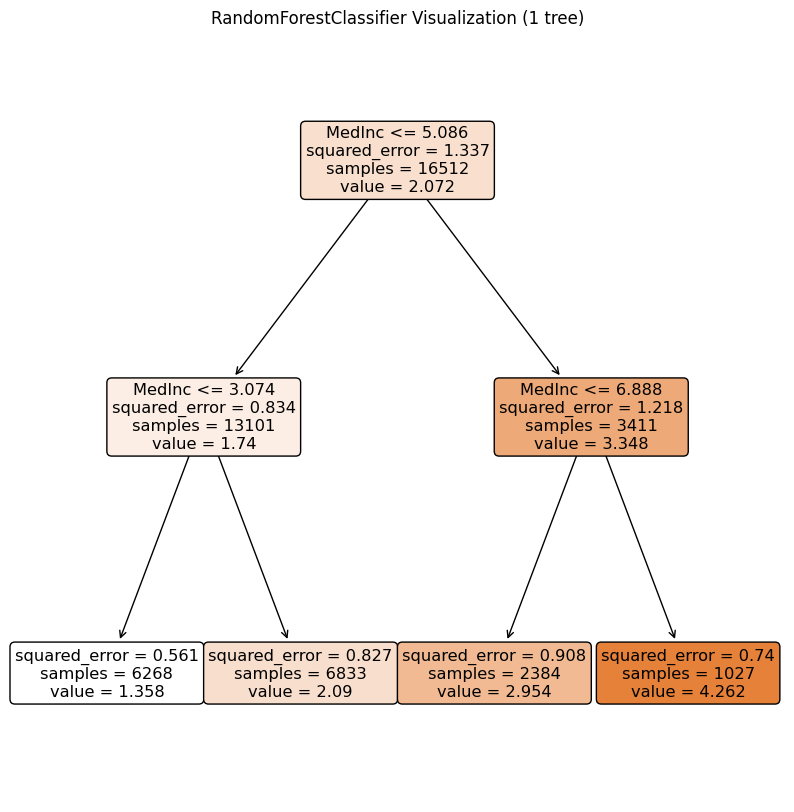

In [6]:

plt.figure(figsize=(10,10))
gbfp_ = RandomBoostingRegressor( gb_n_estimators=1, learning_rate=0.1, max_depth=2, n_estimators = 1,  max_features=1.0, 
                       model_features = 1.,  n_jobs= 30, random_state = 69,  voting_weights =  0)  

gbfp_.fit(X_train, y_train)
selected_tree = gbfp_.modelsTrast[0].model[0, 0]
plot_tree(selected_tree, filled=True, feature_names=gbfp_.modelsTrast[0].selected_features, class_names=np.unique(y_train).astype(str), rounded=True) 
plt.title("MyModel")
plt.show()  


plt.figure(figsize=(10,10))
tree_clf = DecisionTreeRegressor(max_depth=2, max_features = 18, random_state=69) 
tree_clf.fit(X_train, y_train)
#tree_clf.fit(X_train_higgs.sample(frac=1, replace=True, random_state = 60), y_train_higgs.sample(frac=1, replace=True, random_state = 60))
plot_tree(tree_clf, filled=True, feature_names=X_train.columns, class_names= np.unique(y_train).astype(str), rounded=True) 
plt.title("DecisionTreeClassifier Visualization")
plt.show()   

plt.figure(figsize=(10,10))
rf = RandomForestRegressor(n_estimators = 1, max_depth=2, max_features = 18, bootstrap=False,  random_state=69)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns, class_names=np.unique(y_train).astype(str), rounded=True)
plt.title("RandomForestClassifier Visualization (1 tree)") 
plt.show()

In [7]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rb_regressor = RandomBoostingRegressor(random_state=42)
param_grid = {
    'model_features': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0],
    'n_estimators': [10],
    'gb_n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
}

scoring = 'neg_mean_squared_error'
grid_search = GridSearchCV(
    estimator=rb_regressor,
    param_grid=param_grid,
    scoring=scoring,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Лучшие параметры:")
print(grid_search.best_params_)

print("\nЛучший MSE на кросс-валидации:")
best_mse = -grid_search.best_score_
print(f"{best_mse:.4f}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\nОценка лучшей модели на тестовых данных:")
print(f"MSE: {mse_test:.4f}")
print(f"R²: {r2_test:.4f}")

results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_MSE'] = -results['mean_test_score']

pivot_table = results.pivot_table(
    values='mean_test_MSE',
    index='param_model_features',
    columns='param_max_features'
)

print("\nСводная таблица MSE:")
print(pivot_table)


plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Зависимость MSE от model_features и max_features")
plt.xlabel("max_features")
plt.ylabel("model_features")
plt.show()


Fitting 3 folds for each of 16 candidates, totalling 48 fits
